In [1]:
from dir import *
from VAE_model import *
from VAE_model_single import *
from VAE_MoG_model import *
from training import *
from extras import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import itertools
plt.style.use('ggplot')

# 1) Data exploration 

## 1.1) Overall exporation 

In [2]:
data = pd.read_csv(PANGENOME_MATRIX_CSV, index_col=[0], header=[0])

In [3]:
phylogroup_data = pd.read_csv('accessionID_phylogroup2.csv', index_col=[0], header=[0])

In [4]:
phylogroup_data

,Phylogroup
AccessionID,
GCF_000005845,A
GCF_000007445,B2
GCF_000008865,E
GCF_000009565,A
GCF_000010245,A
...,...
GCF_904866495,D
GCF_905071835,F
GCF_905071865,A


In [5]:
data

,GCF_009363035,GCF_016889545,GCF_008065455,GCF_015135355,GCF_000026545,GCF_002012065,GCF_009650175,GCF_016903815,GCF_005221505,GCF_001559655,...,GCF_010365525,GCF_009832985,GCF_013374295,GCF_014168955,GCF_011769865,GCF_000725305,GCF_008124285,GCF_017165375,GCF_001663075,GCF_000022665
GF_ID,,,,,,,,,,,,,,,,,,,,,
GF_1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GF_31460,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31461,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31462,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data.dtypes

GCF_009363035    int64
GCF_016889545    int64
GCF_008065455    int64
GCF_015135355    int64
GCF_000026545    int64
                 ...  
GCF_000725305    int64
GCF_008124285    int64
GCF_017165375    int64
GCF_001663075    int64
GCF_000022665    int64
Length: 1324, dtype: object

In [7]:
data.transpose()

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_001663075,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
data.transpose()[data.transpose()[data.transpose().columns].eq(0).all(1)]

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465


In [9]:
data.columns

Index(['GCF_009363035', 'GCF_016889545', 'GCF_008065455', 'GCF_015135355',
       'GCF_000026545', 'GCF_002012065', 'GCF_009650175', 'GCF_016903815',
       'GCF_005221505', 'GCF_001559655',
       ...
       'GCF_010365525', 'GCF_009832985', 'GCF_013374295', 'GCF_014168955',
       'GCF_011769865', 'GCF_000725305', 'GCF_008124285', 'GCF_017165375',
       'GCF_001663075', 'GCF_000022665'],
      dtype='object', length=1324)

In [10]:
percent_GF_present = data.astype(bool).sum(axis=0) / len(data.index) * 100

In [11]:
percent_GF_present

GCF_009363035    16.990559
GCF_016889545    16.372935
GCF_008065455    16.585366
GCF_015135355    16.443745
GCF_000026545    17.053501
                   ...    
GCF_000725305    15.609756
GCF_008124285    15.778914
GCF_017165375    17.816680
GCF_001663075    15.243902
GCF_000022665    15.062943
Length: 1324, dtype: float64

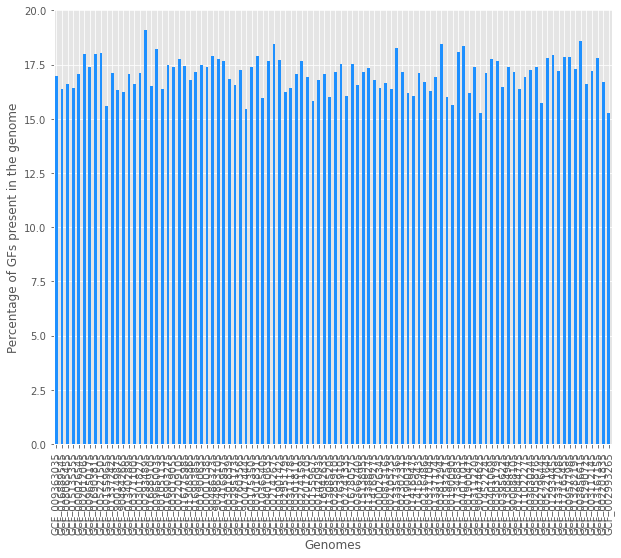

In [12]:
plt.figure(figsize=(10, 8))
percent_GF_present.iloc[:100].plot(kind='bar', color='dodgerblue')
plt.xlabel('Genomes')
plt.ylabel('Percentage of GFs present in the genome')
plt.show()

In [13]:
frequency1 = data.sum(axis=1)

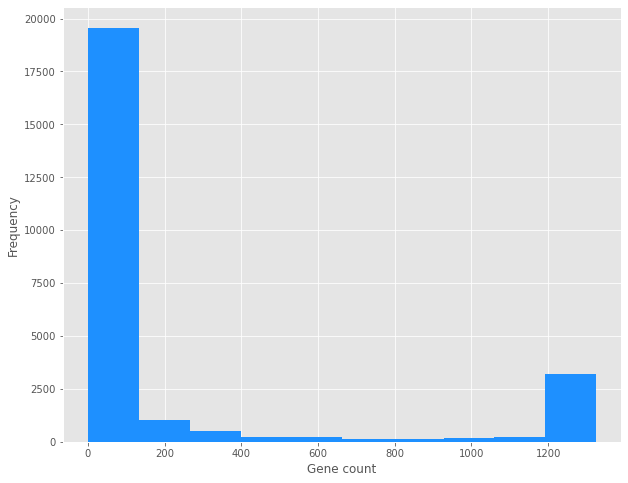

In [14]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='dodgerblue')
plt.xlabel('Gene count')
plt.ylabel('Frequency')
plt.show()

In [15]:
frequency2 = data.sum(0)

In [16]:
frequency2

GCF_009363035    4319
GCF_016889545    4162
GCF_008065455    4216
GCF_015135355    4180
GCF_000026545    4335
                 ... 
GCF_000725305    3968
GCF_008124285    4011
GCF_017165375    4529
GCF_001663075    3875
GCF_000022665    3829
Length: 1324, dtype: int64

In [17]:
# plt.figure(figsize=(10,8))
# plt.hist(frequency2, bin=20)
# plt.xlabel('Genome size')
# plt.ylabel('Gene Gamily Frequency')
# plt.show()

In [18]:
threshold_data = []
thresholds = np.linspace(0, 20, num=10)

for i in thresholds:
    row_sums = data.sum(axis=1)
    threshold_data.append(len(data[row_sums >= i]))


In [19]:
threshold_data

[25420, 17020, 14507, 13058, 12127, 11221, 10721, 10330, 10005, 9730]

In [20]:
thresholds

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

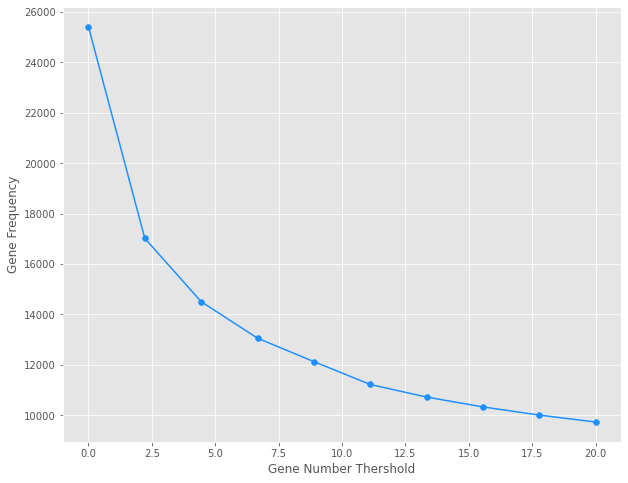

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel('Gene Number Thershold')
plt.ylabel('Gene Frequency')
plt.show()

In [22]:
data.transpose()

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_001663075,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## 1.2) PCA

In [23]:
merged_df = pd.merge(data.transpose(), phylogroup_data, how='inner', left_index=True, right_on='AccessionID')

In [24]:
merged_df

,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465,Phylogroup
AccessionID,,,,,,,,,,,,,,,,,,,,,
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,B1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,B2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,E


In [25]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_df.iloc[:, :-1])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

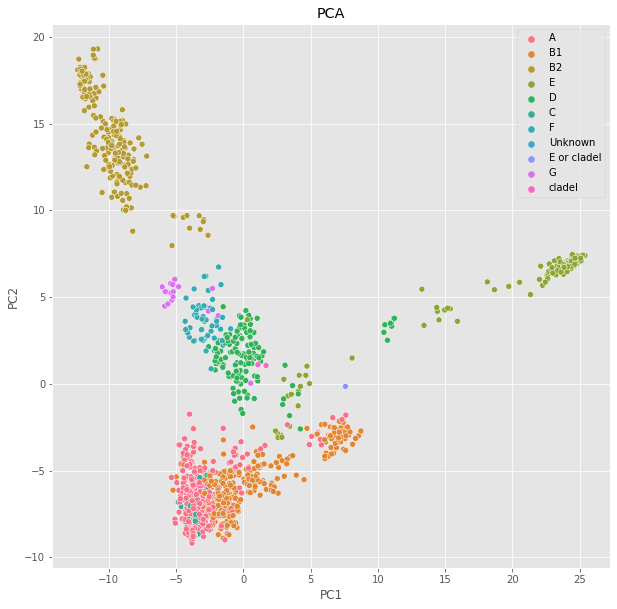

In [26]:
# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = merged_df.Phylogroup.tolist(), data=df_pca)
plt.title('PCA')
plt.show()

In [27]:
df_pca

,PC1,PC2
0,-3.560677,-6.627116
1,-2.650110,-7.136572
2,-0.299936,-6.008099
3,-4.996945,-5.365164
4,-2.953077,9.467883
...,...,...
1319,-4.086980,-7.939809
1320,-2.994488,-7.807338
1321,24.643630,7.241193
1322,-3.746872,-8.790186


In [28]:
shapiro_test_pc1 = shapiro(df_pca['PC1'])
shapiro_test_pc2 = shapiro(df_pca['PC2'])
print(f"Shapiro-Wilk Test for PC1: {shapiro_test_pc1}")
print(f"Shapiro-Wilk Test for PC2: {shapiro_test_pc2}")

Shapiro-Wilk Test for PC1: ShapiroResult(statistic=0.7767663598060608, pvalue=4.115196002779619e-39)
Shapiro-Wilk Test for PC2: ShapiroResult(statistic=0.8642287254333496, pvalue=2.3321049726457904e-32)


# 2) Data preprocessing  

In [29]:
row_sums = data.sum(axis=1)
filtered_data = data[row_sums >= 20]

In [30]:
filtered_data

,GCF_009363035,GCF_016889545,GCF_008065455,GCF_015135355,GCF_000026545,GCF_002012065,GCF_009650175,GCF_016903815,GCF_005221505,GCF_001559655,...,GCF_010365525,GCF_009832985,GCF_013374295,GCF_014168955,GCF_011769865,GCF_000725305,GCF_008124285,GCF_017165375,GCF_001663075,GCF_000022665
GF_ID,,,,,,,,,,,,,,,,,,,,,
GF_1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_14,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_17,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GF_31460,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31461,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31462,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [31]:
data_array_t = np.array(filtered_data.transpose())

In [32]:
data_array_t

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [33]:
data_array_t.shape

(1324, 9730)

In [34]:
data_array_t.shape[1]

9730

In [35]:
# # Normalizing the data with Standard Scaler
# scaler = StandardScaler()
# data_normalized = scaler.fit_transform(data_array_t)

# Convert to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Split into train and test sets
train_data, val_data = train_test_split(data_tensor, test_size=0.2, random_state=12345)

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)

# DataLoaders for main training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Dataloader for overfitting on one sample (for dubbiging purposes)
input_dim = data_array_t.shape[1]
binary_data = torch.tensor(np.random.randint(0, 2, size=(1, input_dim)), dtype=torch.float32)
single_sample_dataset = TensorDataset(binary_data)
single_sample_loader = DataLoader(single_sample_dataset, batch_size=1, shuffle=True)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset = Subset(train_dataset, small_subset_indices)
small_loader = DataLoader(small_subset, batch_size=batch_size, shuffle=True)

In [36]:
len(train_dataset)

1059

In [37]:
len(train_loader)

34

In [38]:
len(train_dataset)

1059

In [39]:
len(val_dataset)

265

In [40]:
train_data

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.]])

In [41]:
TensorDataset(train_data)

In [42]:
TensorDataset(torch.tensor(train_data))

/var/folders/nx/hnfjrvz145n2_hzn95z65pmc0000gn/T/ipykernel_22226/4253064978.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TensorDataset(torch.tensor(train_data))


In [43]:
print(data_tensor)

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])


# 3) Overfitting on a single sample and small data subset

## 3.1) Overfitting on a single sample

In [44]:
single_sample = torch.randn(1, data_array_t.shape[1])

In [45]:
single_sample.shape[0]

1

In [46]:
# NO GRADIENT CLIPPING AND SCHEDULER 
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10

model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting one sample to see if the model is broken 
model.train()
num_epochs = 1000

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 
    
    for data in single_sample_loader:
        data = data[0].to(torch.float)
        # print(data)
        
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}\nLoss (method2) = {loss2.item()}")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(train_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(train_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 6843.177734375
Loss (method2) = 6808.44091796875
Epoch 100
Loss (method1) = 21.016815185546875
Loss (method2) = 21.056503295898438
Epoch 200
Loss (method1) = 9.044574737548828
Loss (method2) = 9.057628631591797
Epoch 300
Loss (method1) = 4.928235054016113
Loss (method2) = 4.946000576019287
Epoch 400
Loss (method1) = 3.1333727836608887
Loss (method2) = 3.1383018493652344
Epoch 500
Loss (method1) = 2.1207499504089355
Loss (method2) = 2.1300628185272217
Epoch 600
Loss (method1) = 1.543056845664978
Loss (method2) = 1.5450397729873657
Epoch 700
Loss (method1) = 1.1690287590026855
Loss (method2) = 1.171913981437683
Epoch 800
Loss (method1) = 0.9193689227104187
Loss (method2) = 0.9239203929901123
Epoch 900
Loss (method1) = 0.7353391647338867
Loss (method2) = 0.7367594838142395
Final Loss after 1000 epochs: 0.6022448539733887


In [47]:
epochs = np.linspace(1, 1000, num=1000)

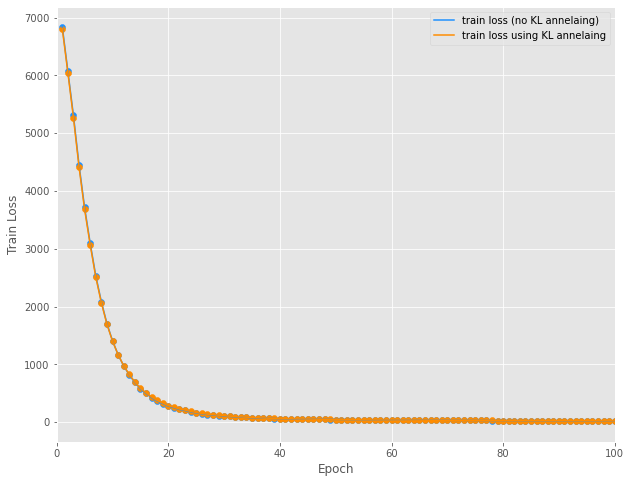

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, label='train loss (no KL annelaing)', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='train loss using KL annelaing', color='darkorange')
plt.xlim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_comparisons_GS.pdf", format="pdf", bbox_inches="tight")
plt.show()

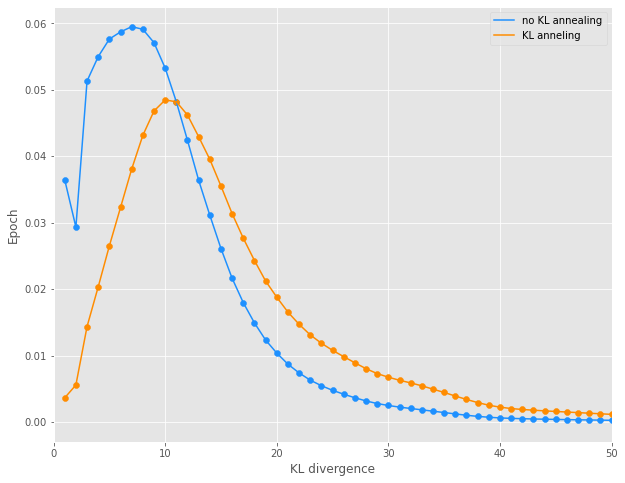

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 50)
plt.xlabel('KL divergence')
plt.ylabel('Epoch')
plt.legend()
plt.savefig("kl_divergence_comparison_no_GS.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [50]:
# GRADIENT CLIPPING PLUS SCHEDULER USED 
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10

# Model
model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting
model.train()
num_epochs = 1000 

# Gradient clipping and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 

    for data in single_sample_loader:
        data = data[0].to(torch.float)

        # print(data)
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    scheduler.step()  

    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss (method1) = {loss.item()}")
        print(f"Epoch {epoch}: Loss (method2) = {loss2.item()}")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(train_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(train_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0: Loss (method1) = 6876.3349609375
Epoch 0: Loss (method2) = 6830.27490234375
Epoch 100: Loss (method1) = 1.1901267766952515
Epoch 100: Loss (method2) = 1.1912413835525513
Epoch 200: Loss (method1) = 0.9785939455032349
Epoch 200: Loss (method2) = 0.978665828704834
Epoch 300: Loss (method1) = 0.978428840637207
Epoch 300: Loss (method2) = 0.9784910678863525
Epoch 400: Loss (method1) = 0.9717518091201782
Epoch 400: Loss (method2) = 0.9718344807624817
Epoch 500: Loss (method1) = 0.9703913927078247
Epoch 500: Loss (method2) = 0.9704952239990234
Epoch 600: Loss (method1) = 0.976620078086853
Epoch 600: Loss (method2) = 0.976745069026947
Epoch 700: Loss (method1) = 0.9729844331741333
Epoch 700: Loss (method2) = 0.9731305837631226
Epoch 800: Loss (method1) = 0.9706097841262817
Epoch 800: Loss (method2) = 0.970777153968811
Epoch 900: Loss (method1) = 0.9745194911956787
Epoch 900: Loss (method2) = 0.974708080291748
Final Loss after 1000 epochs: 0.9754616022109985


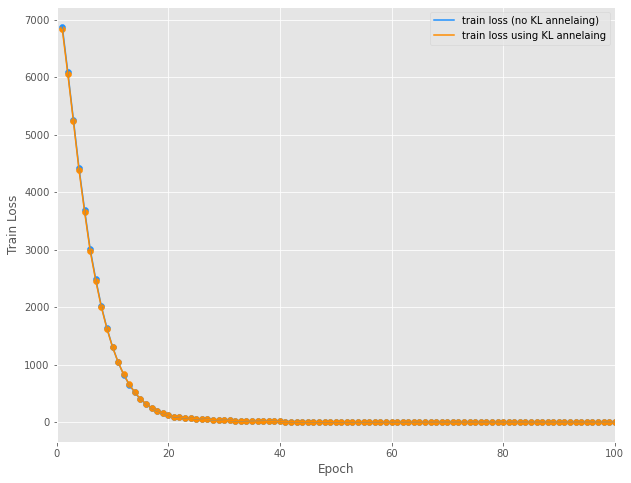

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, label='train loss (no KL annelaing)', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='train loss using KL annelaing', color='darkorange')
plt.xlim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_comparisons_GS.pdf", format="pdf", bbox_inches="tight")
plt.show()

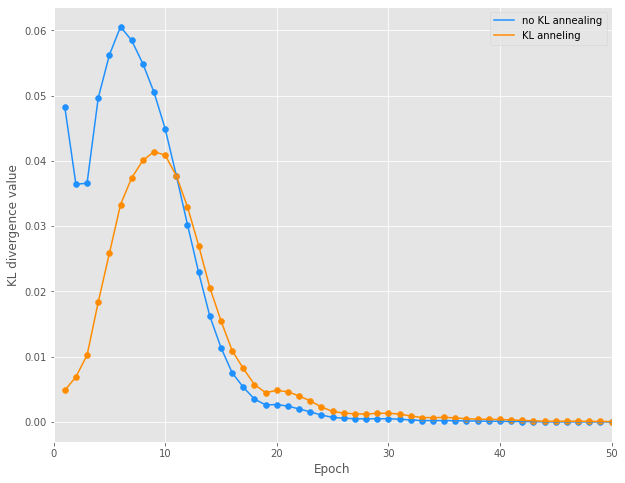

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 50)
plt.xlabel('Epoch')
plt.ylabel('KL divergence value')
plt.legend()
plt.savefig("kl_divergence_comparison_GS.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 3.2) Overfitting on a small train subset

In [53]:
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 1000  

train_loss_vals1 = []
# train_loss_vals2 = []
kl_divergences_no_beta = []
# kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        # epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        # loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}")

    train_loss_vals1.append(loss.item())
    # train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(train_loader.dataset))
    # kl_divergences_beta.append(epoch_kl_divergence_beta / len(train_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 105060.28125
Epoch 100
Loss (method1) = 8686.1953125
Epoch 200
Loss (method1) = 3499.451171875
Epoch 300
Loss (method1) = 3007.91015625
Epoch 400
Loss (method1) = 2357.49755859375
Epoch 500
Loss (method1) = 2659.771728515625
Epoch 600
Loss (method1) = 2942.734130859375
Epoch 700
Loss (method1) = 1640.436767578125
Epoch 800
Loss (method1) = 3726.74609375
Epoch 900
Loss (method1) = 1530.5621337890625
Final Loss after 1000 epochs: 1397.430908203125


In [54]:
# Save trained model
torch.save(model.state_dict(), "saved_small_VAE1.pt")
print("Model saved.")

Model saved.


In [55]:
epochs = np.linspace(1, 1000, num=1000)

No handles with labels found to put in legend.


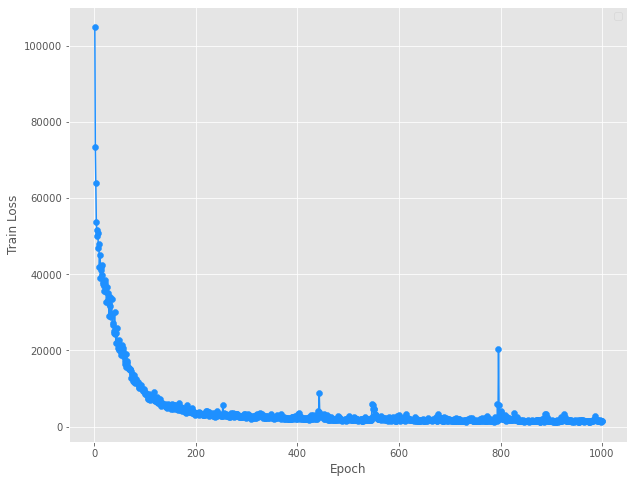

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_small_ds1.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [57]:
# plt.figure(figsize=(10,8))
# plt.scatter(epochs, kl_divergences_no_beta)
# plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing')
# plt.scatter(epochs, kl_divergences_beta)
# plt.plot(epochs, kl_divergences_beta, label = 'KL anneling')
# plt.xlim(0, 50)
# plt.xlabel('Epoch')
# plt.ylabel('KL divergence value')
# plt.legend()
# plt.savefig("kl_divergence_comparison_GS.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [58]:
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 1000  

# train_loss_vals1 = []
train_loss_vals2 = []
# kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence_beta = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        # epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        # loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss2.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method 2) = {loss2.item()}")

    # train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    # kl_divergences_no_beta.append(epoch_kl_divergence / len(train_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(train_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss2.item()}")

Epoch 0
Loss (method 2) = 105855.765625
Epoch 100
Loss (method 2) = 4657.615234375
Epoch 200
Loss (method 2) = 2065.965576171875
Epoch 300
Loss (method 2) = 1500.3271484375
Epoch 400
Loss (method 2) = 1388.614501953125
Epoch 500
Loss (method 2) = 1510.0340576171875
Epoch 600
Loss (method 2) = 1478.49365234375
Epoch 700
Loss (method 2) = 1379.943359375
Epoch 800
Loss (method 2) = 1697.248291015625
Epoch 900
Loss (method 2) = 1799.43310546875
Final Loss after 1000 epochs: 2280.65771484375


In [59]:
# Save trained model
torch.save(model.state_dict(), "saved_small_VAE2.pt")
print("Model saved.")

Model saved.


No handles with labels found to put in legend.


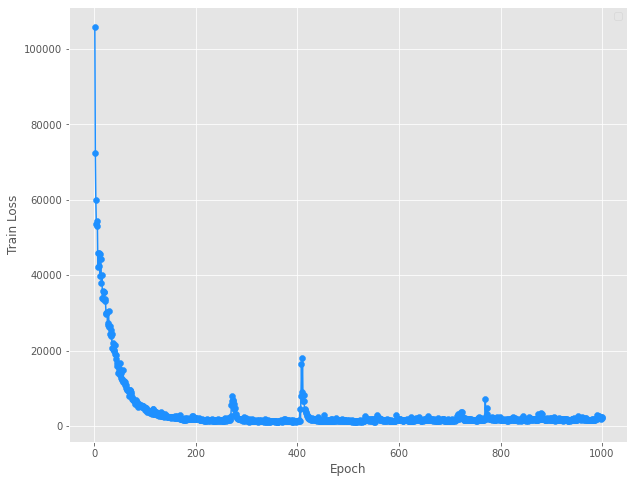

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_small_d2.pdf", format="pdf", bbox_inches="tight")
plt.show()

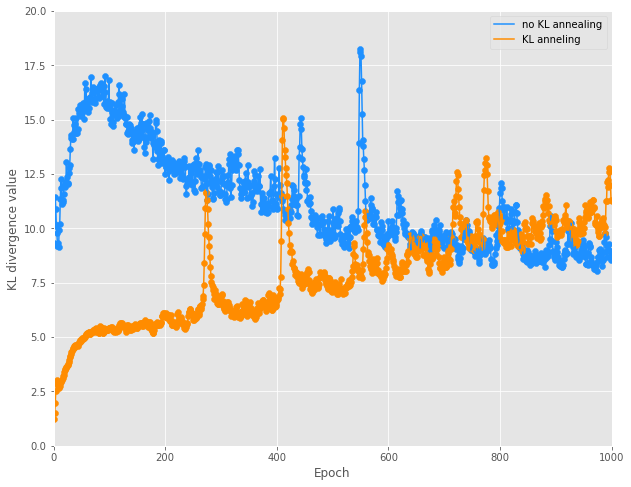

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label = 'no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 1000)
plt.ylim(0, 20)
plt.xlabel('Epoch')
plt.ylabel('KL divergence value')
plt.legend()
plt.savefig("kl_divergence_comparison_1_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 4) Training VAE model on full dataset (train + validation sets)

## 4.1) Training with no KL annealing 

In [62]:
# Model
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64

model1 = VAE(input_dim, hidden_dim, latent_dim).to(device)

# Optimizer and scheduler
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

max_norm = 1.0 
beta_start = 0.1
beta_end = 1.0
n_epochs = 100

train_loss_vals, val_loss_vals = train_no_KL_annelaing(model=model1, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 1): 1148.158620861367
 Validation Loss: 1218.100029481132
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 1): 935.1530717916371
 Validation Loss: 1106.5237433667453
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 1): 792.822921738521
 Validation Loss: 1051.4859964622642
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 1): 713.8918523887512
 Validation Loss: 1042.492073260613
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 1): 642.9559979749469
 Validation Loss: 1024.3421432783018
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 1): 610.8003372322061
 Validation Loss: 1018.0981390035378
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 1): 577.1563574310966
 Validation Loss: 1018.7703585642689
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 1): 552.946798092245
 Validation Loss: 1016.3637603183962
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 1): 544.0490406818047
 Validation Loss: 1018.6

In [63]:
# Save trained model
torch.save(model1.state_dict(), "saved_base_VAE.pt")
print("Model saved.")

Model saved.


In [64]:
epochs = np.linspace(1, 100, num=100)

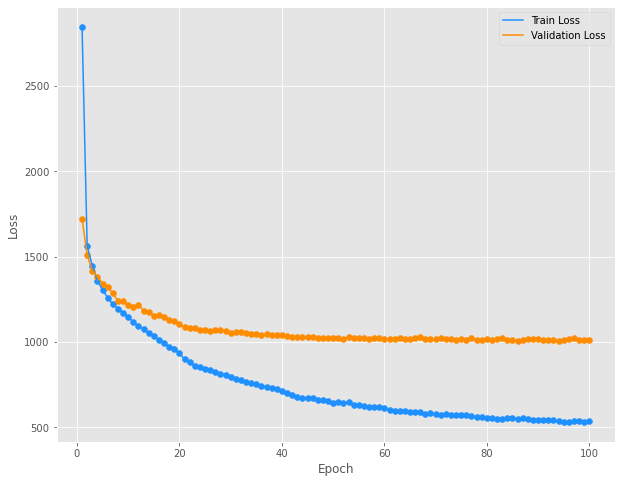

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals, color='dodgerblue')
plt.plot(epochs, train_loss_vals, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("first_model_train_val_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 4.2) Training using KL annealing 

In [67]:
model2 = VAE(input_dim, hidden_dim, latent_dim).to(device)

# Optimizer and scheduler
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

train_loss_vals2, val_loss_vals = train_with_KL_annelaing(model=model2, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 2): 1026.2772358578259
 Validation Loss: 1130.7288657134434
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 2): 808.6988125405749
 Validation Loss: 1037.576201356132
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 2): 661.7674029154863
 Validation Loss: 987.4842460200472
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 2): 585.1732891252066
 Validation Loss: 979.8983859080189
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 2): 523.8782192442752
 Validation Loss: 979.504311615566
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 2): 503.8670339611367
 Validation Loss: 988.1590709758254
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 2): 470.0687964766289
 Validation Loss: 997.8096421727595
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 464.4595879256669
 Validation Loss: 993.2164302034198
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 455.2994408972203
 Validation Loss: 1011.6602

In [68]:
# Save trained model
torch.save(model2.state_dict(), "saved_KL_annealing_VAE.pt")
print("Model saved.")

Model saved.


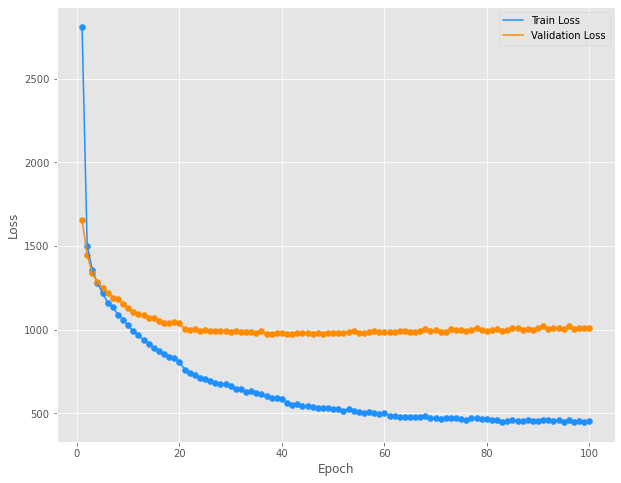

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("second_model_train_val_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

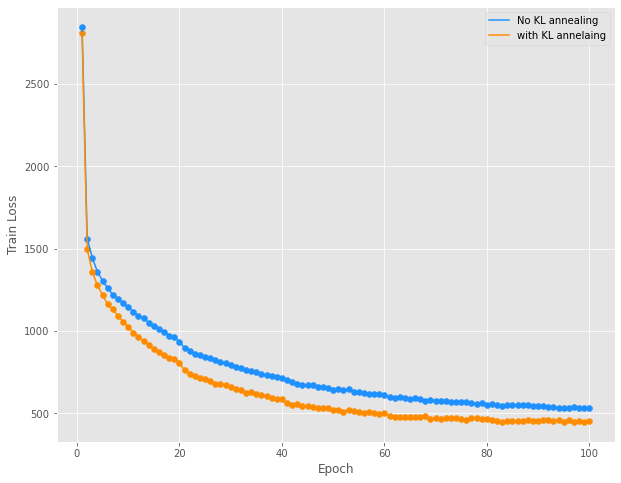

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals, color='dodgerblue')
plt.plot(epochs, train_loss_vals, label='No KL annealing', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='with KL annelaing', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("compare_first_second_train_losses.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 4.3) (Experiment) Training a MoG VAE (later)

In [71]:
# num_components = 3
# model2 = VAEWithMoGPrior(input_dim, hidden_dim, latent_dim, num_components).to(device)
# optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# train(model=model2, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

In [72]:
# # save trained model
# torch.save(model2.state_dict(), "saved_MoG_VAE.pt")
# print("Model saved.")

# 5) Observing the latent spaces of the model(s) fitted

In [73]:
# Trying to get teh latent space
# Get latent variables
latents = get_latent_variables(model2, train_loader, device)

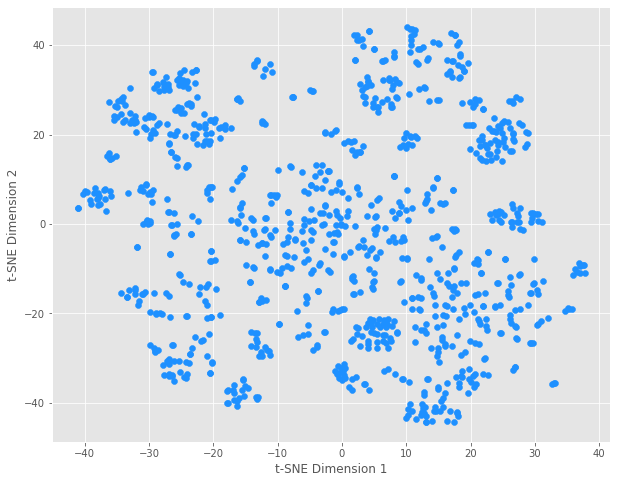

In [74]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
latents_2d = tsne.fit_transform(latents)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], color='dodgerblue')
# plt.xlim(-400, 400)
# plt.ylim(-400, 400)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig("tsne_latent_space_visualisation.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [75]:
latents_2d

array([[ -0.5008522,   8.895601 ],
       [  9.447682 , -34.72319  ],
       [ 11.443916 ,  19.664669 ],
       ...,
       [ 28.062767 ,  22.109756 ],
       [  4.0943856,  31.741491 ],
       [ 13.986592 , -44.090656 ]], dtype=float32)

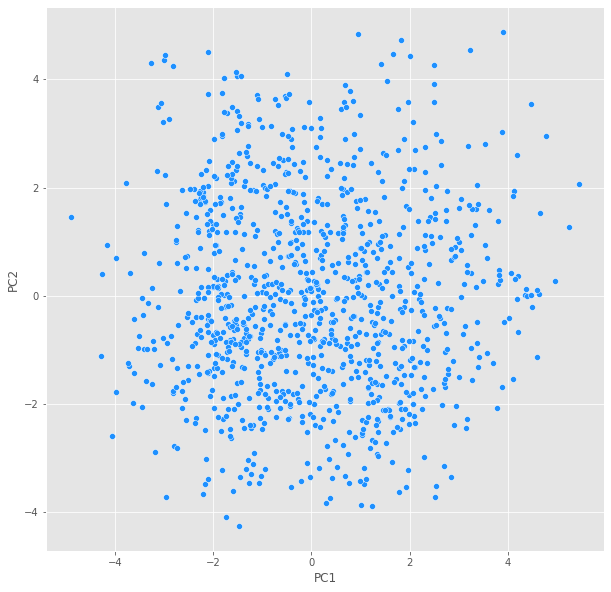

In [76]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, color='dodgerblue')
plt.savefig("pca_latent_space_visualisation.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 5) Reconstruction/generation (evaluation) (to do later, just a test for now)

In [77]:
# Load trained model 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('saved_base_VAE.pt'))  
model.eval()  

# Generate 10 new samples
num_samples = 10 
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution (????)
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples:\n", binary_generated_samples)
print("Generated samples:\n", generated_samples)


Generated samples:
 [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Generated samples:
 [[1.0467149e-02 3.8989091e-03 8.0730297e-02 ... 9.9990165e-01
  9.9990499e-01 9.9993372e-01]
 [8.9804077e-04 1.0930411e-04 7.1283139e-02 ... 9.9994779e-01
  9.9996817e-01 9.9995542e-01]
 [2.7498884e-02 1.1969464e-02 1.5188600e-02 ... 9.9997592e-01
  9.9996543e-01 9.9997830e-01]
 ...
 [4.0358558e-02 1.0000457e-01 7.7109672e-02 ... 9.9997854e-01
  9.9997699e-01 9.9998248e-01]
 [4.2521641e-01 1.7700206e-02 1.6761930e-03 ... 9.9974114e-01
  9.9980003e-01 9.9979645e-01]
 [1.5859462e-01 6.4685838e-03 5.7168651e-02 ... 9.9991560e-01
  9.9989879e-01 9.9995410e-01]]


# 6) Hyperparameter tuning

## 6.1) Gridserch for simple hyperparameter tuning

In [78]:
# # Gridsearch
# input_dim = data_array_t.shape[1]
# hidden_dim_values = [256, 512, 1024]
# latent_dim_values = [32, 64, 128]
# learning_rate_values = [0.01, 1e-3] # Decrease of learning rate causes higher average train loss, better if 0.01, 0.001
# # beta_start_values = [0.01, 0.1, 0.2]
# # beta_end_values = [0.5, 1.0, 2.0]
# # max_norm_values = [0.5, 1.0, 2.0]
# max_norm = 1.0 
# beta_start = 0.1
# beta_end = 1.0

# # beta_start, beta_end, max_norm
# for hidden_dim, latent_dim, learning_rate in itertools.product(
#     hidden_dim_values, latent_dim_values, learning_rate_values): #beta_start_values, beta_end_values, max_norm_values
#     print(f"Training with hidden_dim={hidden_dim}, latent_dim={latent_dim}, learning_rate={learning_rate}") # beta_start={beta_start}, beta_end={beta_end}, max_norm={max_norm}"
#     model = VAE(input_dim, hidden_dim, latent_dim).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#     scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
#     train_with_KL_annelaing(model=model, optimizer=optimizer, scheduler=scheduler, n_epochs=10, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)
#     print("--------------------------------------------------------------------------------------")

### result - best params hidden_dim = 1024, latent_dim = 32, lr = 1e-3 (based on average train and val loss)

In [80]:
input_dim = data_array_t.shape[1]
hidden_dim = 1024
latent_dim = 32
max_norm = 1.0 
beta_start = 0.1
beta_end = 1.0
n_epochs = 100


model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

train_loss_vals2, val_loss_vals = train_with_KL_annelaing(model=model, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 2): 1004.0902545702019
 Validation Loss: 1137.517150648585
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 2): 777.1889629994394
 Validation Loss: 1211.9789652122643
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 2): 621.528649060877
 Validation Loss: 1021.3971550707547
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 2): 528.374832167729
 Validation Loss: 1009.4937020931603
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 2): 459.53934514061024
 Validation Loss: 1012.5041678950472
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 2): 417.1410279818815
 Validation Loss: 1025.7582344487028
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 2): 399.4391372867977
 Validation Loss: 1038.943532576651
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 376.27032891436494
 Validation Loss: 1039.273572007665
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 360.1592903461402
 Validation Loss: 1065

In [88]:
torch.save(model.state_dict(), "saved_KL_annealing_VAE_tuned.pt")
print("Model saved.")

Model saved.


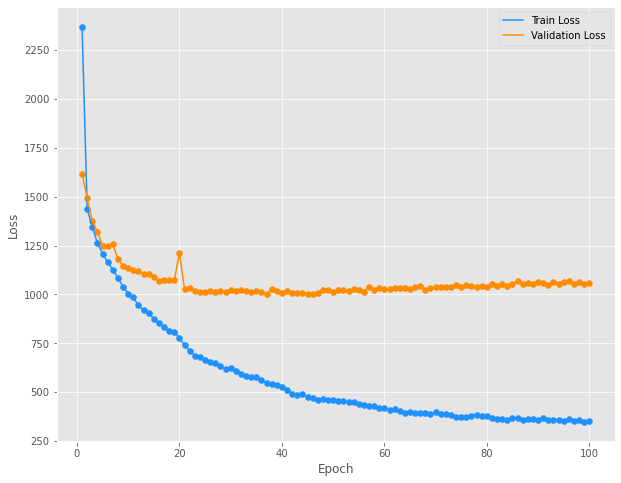

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# AHPT - after hyperparameter tuning
plt.savefig("AHPT_model_train_val_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [82]:
latents = get_latent_variables(model, train_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

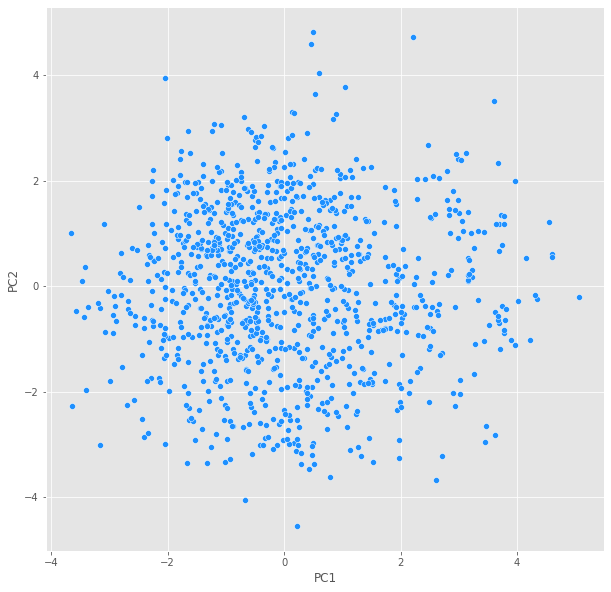

In [83]:
# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, color='dodgerblue')
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
# AHPT - after hyperparameter tuning
plt.savefig("pca_latent_space_visualisation_AHPT.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [84]:
len(latents)

1059

In [85]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(latents)

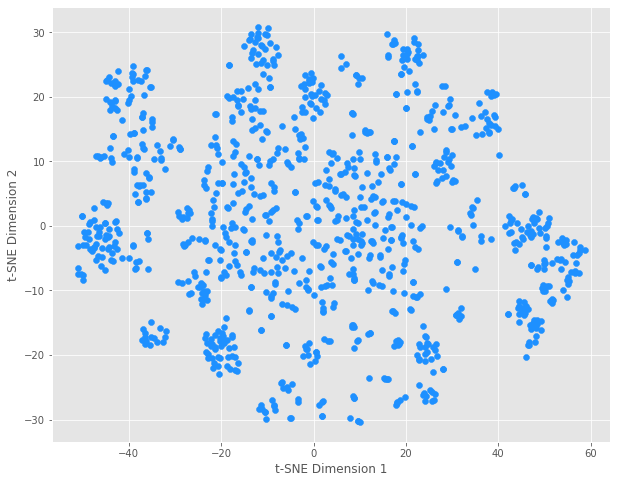

In [86]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], color='dodgerblue')
# plt.xlim(-20, 20)
# plt.ylim(-20, 20)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# AHPT - after hyperparameter tuning
plt.savefig("tsne_latent_space_visualisation_AHPT.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [87]:
len(data_tsne)

1059